In [171]:
import networkx as nx
import numpy as np
from plotnine import *

In [3]:
node_pos_dic = {0: [0, 0, 0]}
np.array(node_pos_dic[0]) + np.array([1, 0, 0])


array([1, 0, 0])

In [4]:
def generate_toy_skeleton_graph(num_nodes, angle, edge_length):
    # Create a toy graph
    graph = nx.Graph()

    # Convert angle to radians
    angle_rad = np.radians(angle/2)

    # Add node positions
    node_pos_dic = {0: np.array([0, 0])}
    parent_nodes = [0]  # Start with the root node
    i = 1

    while i < num_nodes:
        new_parents = []
        for parent_node in parent_nodes:
            if i < num_nodes:
                # Add the first child
                m = edge_length * np.cos(angle_rad)
                n = edge_length * np.sin(angle_rad)
                node_pos_dic[i] = node_pos_dic[parent_node] + np.array([m, n]) 
                graph.add_node(i)
                graph.add_edge(parent_node, i)
                new_parents.append(i)
                i += 1

            if i < num_nodes:
                # Add the second child
                m = edge_length * np.cos(-1*angle_rad)
                n = edge_length * np.sin(-1*angle_rad)
                node_pos_dic[i] = node_pos_dic[parent_node] + np.array([m, n]) 
                graph.add_node(i)
                graph.add_edge(parent_node, i)
                new_parents.append(i)
                i += 1

        parent_nodes = new_parents

    nx.set_node_attributes(graph, node_pos_dic, 'pos')
    return graph, node_pos_dic


In [26]:
import networkx as nx
import numpy as np
import pytest
from napari_skeleton_curator.skeleton import *
# from napari_skeleton_curator.utils import *

EDGE_COORDINATES_KEY = "edge_coordinates"

def generate_toy_skeleton_graph(num_nodes, angle, edge_length):
    # Create a toy graph
    graph = nx.Graph()

    # Convert angle to radians
    angle_rad = np.radians(angle/2)

    # Add node positions
    node_pos_dic = {0: np.array([0, 0, 0])}
    parent_nodes = [0]  # Start with the root node
    i = 1

    while i < num_nodes:
        new_parents = []
        for parent_node in parent_nodes:
            if i < num_nodes:
                # Add the first child
                m = edge_length * np.cos(angle_rad)
                n = edge_length * np.sin(angle_rad)
                new_pos = node_pos_dic[parent_node] + np.array([m, n, 0])
                node_pos_dic[i] = new_pos
                edge_coordinates = np.linspace(node_pos_dic[parent_node], new_pos, 5+edge_length)
                graph.add_node(i)
                graph.add_edge(parent_node, i,edge_coordinates=edge_coordinates)
                new_parents.append(i)
                i += 1

            if i < num_nodes:
                # Add the second child and rotate in the other direction
                m = edge_length * np.cos(-1*angle_rad)
                n = edge_length * np.sin(-1*angle_rad)
                new_pos = node_pos_dic[parent_node] + np.array([m, n, 0])
                node_pos_dic[i] = new_pos                
                edge_coordinates = np.linspace(node_pos_dic[parent_node], new_pos, edge_length)

                graph.add_node(i)
                graph.add_edge(parent_node, i, edge_coordinates=edge_coordinates)
                new_parents.append(i)
                i += 1

        parent_nodes = new_parents

    nx.set_node_attributes(graph, node_pos_dic, EDGE_COORDINATES_KEY)
    return graph, node_pos_dic


def test_compute_branch_length():
    # Generate a toy graph
    num_nodes = 10
    edge_length = 10
    graph, _ = generate_toy_skeleton_graph(num_nodes, 60, edge_length)
    # Compute the branch lengths
    compute_branch_length(graph)
    branch_lengths = nx.get_edge_attributes(graph, 'length')
    num_edges = len(graph.edges)
    sum_length = np.round(sum(branch_lengths.values()),2)

    # Check the branch lengths
    assert sum_length == num_edges * edge_length
test_compute_branch_length()


{(1, 0): 10.0, (1, 3): 10.0, (1, 4): 10.0, (0, 2): 10.0, (2, 5): 10.0, (2, 6): 10.0, (3, 7): 9.999999999999996, (3, 8): 9.999999999999998, (4, 9): 10.0}
90.0 90


In [34]:
def generate_toy_skeleton_graph(num_nodes, angle, edge_length):
    # Create a toy graph
    graph = nx.Graph()

    # Convert angle to radians
    angle_rad = np.radians(angle/2)

    # Add node positions
    node_pos_dic = {0: np.array([0, 0, 0])}
    parent_nodes = [0]  # Start with the root node
    i = 1
    #add trachea
    trachea_pos = np.array([-edge_length, 0, 0])
    node_pos_dic[-1] = trachea_pos
    graph.add_node(-1, node_coordinate = trachea_pos)
    graph.add_edge(-1, 0, edge_coordinates=np.linspace(trachea_pos, np.array([0, 0, 0]), 5+edge_length))
    while i < num_nodes:
        new_parents = []
        for parent_node in parent_nodes:
            if i < num_nodes:
                # Add the first child
                m = edge_length * np.cos(angle_rad)
                n = edge_length * np.sin(angle_rad)
                new_pos = node_pos_dic[parent_node] + np.array([m, n, 0])
                node_pos_dic[i] = new_pos
                edge_coordinates = np.linspace(node_pos_dic[parent_node], new_pos, 5+edge_length)
                graph.add_node(i)
                graph.add_edge(parent_node, i,edge_coordinates=edge_coordinates)
                new_parents.append(i)
                i += 1

            if i < num_nodes:
                # Add the second child and rotate in the other direction
                m = edge_length * np.cos(-1*angle_rad)
                n = edge_length * np.sin(-1*angle_rad)
                new_pos = node_pos_dic[parent_node] + np.array([m, n, 0])
                node_pos_dic[i] = new_pos                
                edge_coordinates = np.linspace(node_pos_dic[parent_node], new_pos, edge_length)

                graph.add_node(i)
                graph.add_edge(parent_node, i, edge_coordinates=edge_coordinates)
                new_parents.append(i)
                i += 1

        parent_nodes = new_parents

    nx.set_node_attributes(graph, node_pos_dic, NODE_COORDINATE_KEY)
    return graph, node_pos_dic
graph, pos = generate_toy_skeleton_graph(10, 60, 15)

In [1]:
import numpy as np
import networkx as nx
import pytest
from napari_skeleton_curator.skeleton import *
# from napari_skeleton_curator.utils import *

from napari_skeleton_curator.utils import generate_toy_skeleton_graph
from napari_skeleton_curator.measurements import *


def test_compute_midline_branch_angles():
    # Generate a toy graph
    num_nodes = 10
    edge_length = 10
    angle = 60
    origin = -1
    graph, _ = generate_toy_skeleton_graph(num_nodes, angle, edge_length)
    # Compute the branch lengths
    compute_branch_length(graph)
    compute_start_end_node(graph, origin)
    compute_level(graph, origin)
    angle_df,_,_,_,_,_ = compute_midline_branch_angles(graph, origin = -1)
    branch_angles = angle_df['angle']
    num_edges = len(graph.edges)
    sum_angle = np.round(sum(branch_angles.values),2)


    assert sum_angle == num_edges * angle/2

test_compute_midline_branch_angles()

/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/pydantic/_migration.py:283: UserWarning: `pydantic.generics:GenericModel` has been moved to `pydantic.BaseModel`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/pydantic/_internal/_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'allow_mutation' has been removed
  warnings.warn(message, UserWarning)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/pydantic/_internal/_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'allow_mutation' has been removed
  warnings.warn(message, UserWarning)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/pydantic/_internal/_config.py:334: UserWarning: Valid config keys have changed in V2:
* 'allow_mutation' has been removed
  warnings.warn(message, UserWarning)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/pydantic/_internal/_config.py:334:

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


AssertionError: 

In [10]:
num_nodes = 10
edge_length = 100
angle = 60
origin = -1
graph, _ = generate_toy_skeleton_graph(num_nodes, angle, edge_length)
# Compute the branch lengths
compute_branch_length(graph)
compute_start_end_node(graph, origin)
compute_level(graph, origin)
angle_df,center_points,mid_points,_,_,_ = compute_midline_branch_angles(graph, origin = -1, sample_distance=1)
branch_angles = angle_df['angle']
num_edges = len(graph.edges)
sum_angle = np.round(sum(branch_angles.values),2)


sum_angle

239.86

In [9]:
from napari_skeleton_curator import skeleton
viewer = napari.Viewer()
viewer.dims.ndisplay = 3
# viewer.add_image(e15_larger, scale = image_voxel_size, name = 'e15_image')
sample_number = 13
skeleton_obj = skeleton.Skeleton3D.parse(graph = graph)
skeleton_viewer = skeleton.SkeletonViewer(skeleton = skeleton_obj, 
                                          viewer=viewer, 
                                          image = np.zeros((1,1,1)),
                                          # image = prediction,
                                            edge_width=3, 
                                            image_voxel_size=(1,1,1))



initilize nodes
initilize edges


/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:1

In [14]:
angle_df

,level,angle,edge,num_tips
0,1,30.052625,"(0, 1)",3
1,1,29.973022,"(0, 2)",2
2,2,0.126404,"(1, 3)",2
3,2,59.703802,"(1, 4)",2
4,2,59.994866,"(2, 5)",0
5,2,0.118708,"(2, 6)",0
6,3,0.806446,"(3, 7)",0
7,3,59.082406,"(3, 8)",0


/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:1

In [159]:
def generate_toy_skeleton_graph_symmetric_branch_angle(num_nodes, angle, edge_length):
    # Create a toy graph
    graph = nx.DiGraph()

    angle_rad = np.radians(angle/2)



    # Add node positions
    node_pos_dic = {0: np.array([0, 0, 0])}
    parent_nodes = [0]  # Start with the root node
    #add trachea
    trachea_pos = np.array([-edge_length, 0, 0])
    node_pos_dic[-1] = trachea_pos
    graph.add_node(-1, node_coordinate = trachea_pos)
    graph.add_edge(-1, 0, edge_coordinates=np.linspace(trachea_pos, np.array([0, 0, 0]), 5+edge_length))
    
    #initialize the first two branches 
    m = edge_length * np.cos(angle_rad)
    n = edge_length * np.sin(angle_rad)
    new_pos = node_pos_dic[0] + np.array([m, n, 0])
    node_pos_dic[1] = new_pos
    edge_coordinates = np.linspace(node_pos_dic[0], new_pos, 5+edge_length)
    graph.add_node(1)
    graph.add_edge(0, 1,edge_coordinates=edge_coordinates, side = 'left')
    m = edge_length * np.cos(-1*angle_rad)
    n = edge_length * np.sin(-1*angle_rad)
    new_pos = node_pos_dic[0] + np.array([m, n, 0])
    node_pos_dic[2] = new_pos
    edge_coordinates = np.linspace(node_pos_dic[0], new_pos, 5+edge_length)
    graph.add_node(2)
    graph.add_edge(0, 2,edge_coordinates=edge_coordinates, side = 'right')
    
    parent_nodes = [1, 2]  # Start with the root node
    i = 3
    while i < num_nodes:
        new_parents = []
        for parent_node in parent_nodes:
            if i < num_nodes:
                # Add the first child
                #if the parent is a left node, the child is a left node and 
                # needs to be rotated to the left
                    # Convert angle to radians
                angle_rad = np.radians(angle/2)

                #get the path to node 0 and count the number of left vs right edges
                path = nx.shortest_path(graph, 0, parent_node)
                edges = [(path[i], path[i+1]) for i in range(len(path)-1)]               
                #get sides 
                sides = [graph.edges[edge]['side'] for edge in edges]
                #count the number of left and right edges
                left_edges = sides.count('left')
                right_edges = sides.count('right')
                num_rotations = left_edges - right_edges

                angle_rad = angle_rad*(num_rotations+1)

                # if list(graph.in_edges(parent_node, data=True))[0][2]['side'] == 'right':
                #     angle_rad = angle_rad*-1

                m = edge_length * np.cos(angle_rad)
                n = edge_length * np.sin(angle_rad)
                side = 'left'



                new_pos = node_pos_dic[parent_node] + np.array([m, n, 0])


                    


                node_pos_dic[i] = new_pos
                edge_coordinates = np.linspace(node_pos_dic[parent_node], new_pos, 5+edge_length)
                graph.add_node(i)
                graph.add_edge(parent_node, i,edge_coordinates=edge_coordinates, side = side)
                new_parents.append(i)
                i += 1

            if i < num_nodes:
                # Add the second child and rotate in the other direction
                angle_rad = np.radians(angle)/2

                #get the path to node 0 and count the number of left vs right edges
                path = nx.shortest_path(graph, 0, parent_node)
                edges = [(path[i], path[i+1]) for i in range(len(path)-1)]               
                #get sides 
                sides = [graph.edges[edge]['side'] for edge in edges]
                #count the number of left and right edges
                left_edges = sides.count('left')
                right_edges = sides.count('right')
                num_rotations = left_edges - right_edges

                angle_rad = angle_rad*(num_rotations-1)
                


                # if list(graph.in_edges(parent_node, data=True))[0][2]['side'] == 'right':
                #     angle_rad = angle_rad*-1

                m = edge_length * np.cos(1* angle_rad)
                n = edge_length * np.sin(1* angle_rad)
                side = 'right'
                new_pos = node_pos_dic[parent_node] + np.array([m, n, 0])
                node_pos_dic[i] = new_pos                
                edge_coordinates = np.linspace(node_pos_dic[parent_node], new_pos, 5+edge_length)

                graph.add_node(i)
                graph.add_edge(parent_node, i, edge_coordinates=edge_coordinates, side = side)
                new_parents.append(i)
                i += 1

        parent_nodes = new_parents


        #add splines
        for edge in graph.edges:
            edge_coordinates = graph.edges[edge][EDGE_COORDINATES_KEY]
            edge_spline = Spline3D(points = edge_coordinates)
            graph.edges[edge][EDGE_SPLINE_KEY] = edge_spline



    nx.set_node_attributes(graph, node_pos_dic, NODE_COORDINATE_KEY)
    return graph, node_pos_dic

In [151]:
g, pos = generate_toy_skeleton_graph_v2(21, 90, 16)
#drop 3 coordinate in pos
pos = {k:v[:2] for k,v in pos.items()}

In [154]:
compute_branch_length(g)
g.edges(data='length')

OutEdgeDataView([(-1, 0, 16.0), (0, 1, 16.0), (0, 2, 16.0), (1, 3, 16.0), (1, 4, 15.999999999999998), (2, 5, 15.999999999999998), (2, 6, 16.0), (3, 7, 15.999999999999998), (3, 8, 16.0), (4, 9, 15.999999999999998), (4, 10, 15.999999999999998), (5, 11, 15.999999999999998), (5, 12, 15.999999999999998), (6, 13, 16.0), (6, 14, 15.999999999999998), (7, 15, 16.0), (7, 16, 16.0), (8, 17, 16.0), (8, 18, 16.0), (9, 19, 16.0), (9, 20, 16.0)])

<Figure size 1000x1000 with 0 Axes>

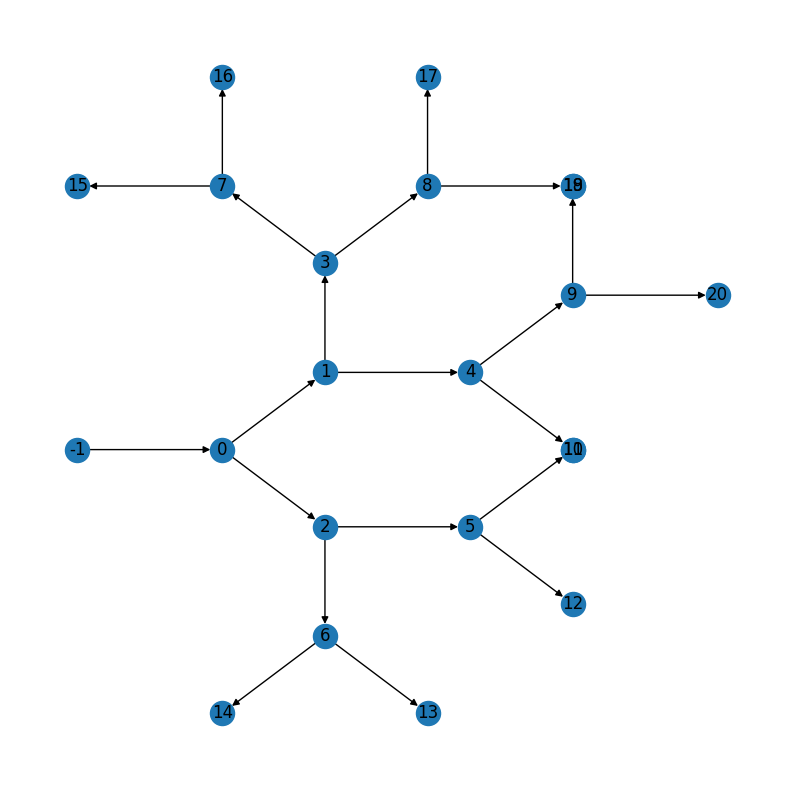

In [152]:
#alwasy use same aspect ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax, fig = plt.subplots(figsize=(10,10))



nx.draw(g, pos = pos, with_labels = True, ax=fig)

In [12]:

center_vector = [[center_points[i], mid_points[i]] for i in range(min(len(center_points), len(mid_points)))]
# daughter_vector = [[center_points[i], daughter_point[i]] for i in range(min(len(center_points), len(daughter_point)))]
skeleton_viewer.viewer.add_shapes(data = center_vector, shape_type = 'path', edge_width = 2, edge_color = 'blue', name = 'midline')

<Shapes layer 'midline' at 0x7f18678ac950>

/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:180: RuntimeWarning: invalid value encountered in divide
  ray_direction = ray_direction / np.linalg.norm(ray_direction)
/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/napari/layers/utils/interactivity_utils.py:1

In [155]:
import numpy as np
import networkx as nx
from napari_skeleton_curator.skeleton import *
from napari_skeleton_curator.measurements import compute_midline_branch_angles
from napari_skeleton_curator.utils import generate_toy_skeleton_graph

In [176]:
g, pos = generate_toy_skeleton_graph_v2(20, 72.5, 15)
compute_branch_length(g)
compute_start_end_node(g, -1)
compute_level(g, -1)
angle_df, center_points, mid_points, _, _, _ = compute_midline_branch_angles(g, -1, sample_distance=1)
#add fractal radius
radius_dict = {}
r0 = 10
for edge in g.edges(data=True):
    # radius_dict[edge[:2]] = 1
    level = g.edges[edge[:2]]['level']
    radius = r0 * 2**(-level/3)
    # print(level, radius)
    radius_dict[edge[:2]] = radius
nx.set_edge_attributes(g, radius_dict, 'radius')

#add to angle_df
radius_df = pd.DataFrame(radius_dict.items(), columns = ["edge", "radius"])
# angle_df['radius'] = [radius_dict[(i,j)] for i,j in zip(angle_df['parent'], angle_df['child'])]

#merge
angle_df = angle_df.merge(radius_df, how='left', on = 'edge')

In [177]:
def add_parent_angles(graph,df, origin):
    tree = nx.DiGraph(graph)
    tree.remove_edges_from(tree.edges - nx.bfs_edges(tree, origin))

    edge_length = []
    parent_edges = []
    angle_edges = df['edge']
    for edge in angle_edges:
        edge = graph.edges[edge]

        edge_length.append(edge['length'])
        # parent_edges.append(e14_skeleton.graph.edges[edge]['parent'])
        parent_edge = tree.in_edges(edge['start_node'])
        parent_edges.append(list(parent_edge)[0])
    df['length'] = edge_length
    df['parent_edge'] = parent_edges

    parent_angle = []
    parent_nTips = []
    parent_radius = []
    for row in df.iterrows():
        parent_row = df.loc[df['edge'] == row[1]['parent_edge']]

        if len(parent_row) == 0:
            parent_angle.append(None)
            parent_nTips.append(None)
            parent_radius.append(None)
        else:
            parent_angle.append(parent_row['angle'].values[0])
            parent_nTips.append(parent_row['num_tips'].values[0])
            parent_radius.append(parent_row['radius'].values[0])
    df['parent_angle'] = parent_angle
    df['parent_nTips'] = parent_nTips
    df['parent_radius'] = parent_radius
    return df


angle_df = add_parent_angles(g,angle_df, -1)

/local0/anaconda3/envs/sandbox/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


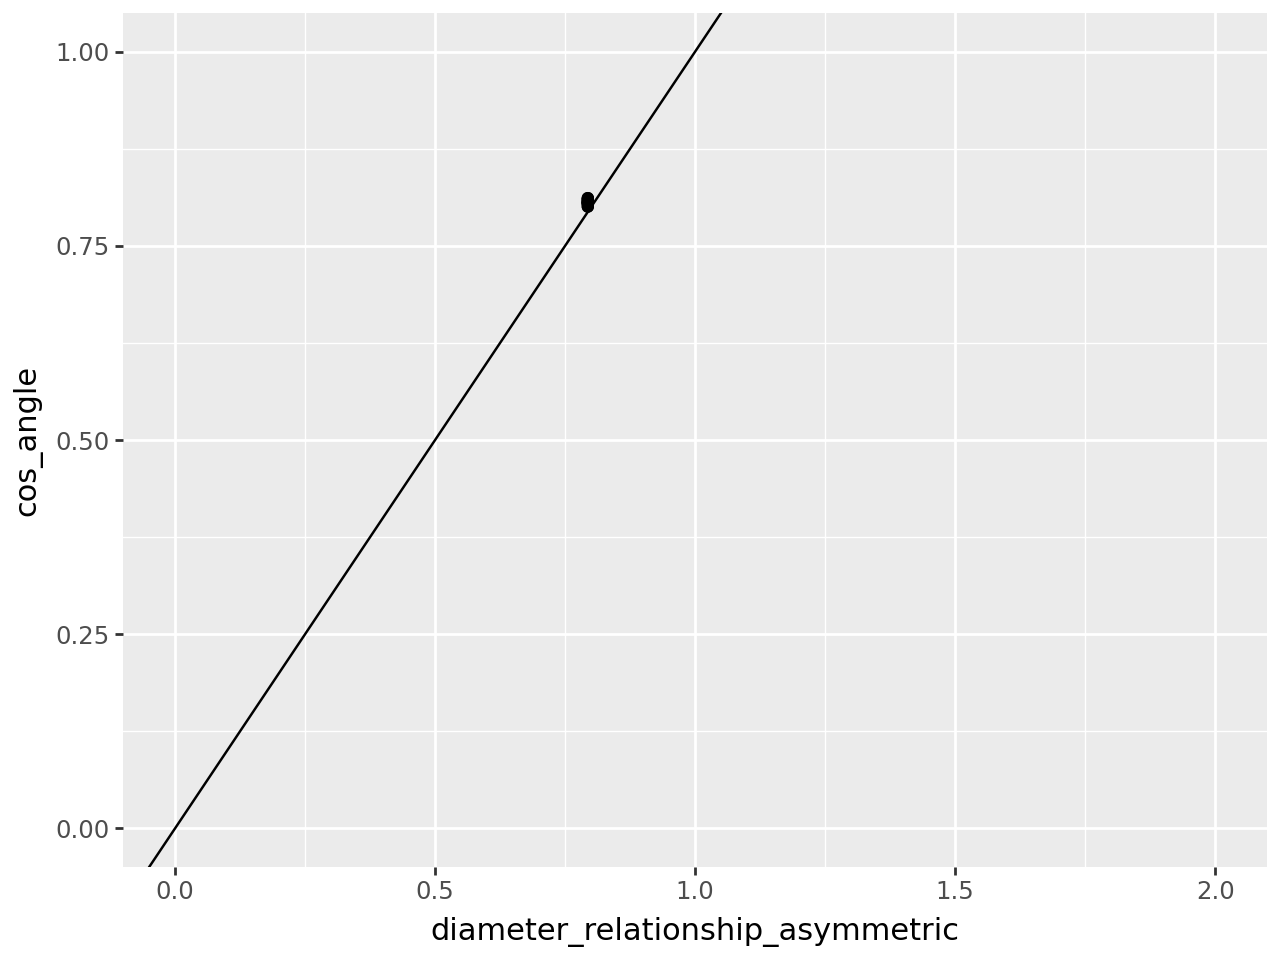

In [178]:
nominator = angle_df['parent_radius']**4 + angle_df['radius']**4 - (angle_df['parent_radius']**3 - angle_df['radius']**3)**(4/3)
denominator = 2*angle_df['parent_radius']**2 * angle_df['radius']**2
angle_df['diameter_relationship_asymmetric'] = nominator/denominator
angle_df['cos_angle'] = np.cos(np.radians(angle_df['angle']))
(ggplot(angle_df, aes(x='diameter_relationship_asymmetric', y='cos_angle')) + geom_point() + geom_abline(intercept=0, slope=1) 
 +scale_x_continuous(limits = (0,2))
 +scale_y_continuous(limits = (0,1))
)